In [1]:
#Installing numpy,panda for Data-PreProcessing
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt # matplotlib-> plotting visual garph

In [2]:
#reading the datasets
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
#The head() method returns the first 5 rows if a number is not specified
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data) # mapping data into an array
m, n = data.shape # mapping data into number of rows(m) & columns(n)
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T # Transpose the array 
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.


data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape


In [5]:
Y_train

array([8, 8, 4, ..., 3, 8, 5])

In [6]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):  # Activation Function 
    return np.maximum(Z, 0)

def softmax(Z):  # Activation Function
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):   # Function for FORWARD PROPAGATION
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):   #  a one-hot vector is a 1 × N matrix (vector) used to distinguish each digit from 0-9
    one_hot_Y = np.zeros((Y.size, Y.max() + 1)) 
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):  # Function for Backward Propagation
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha): # Function to update parameters
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2
    
   

In [7]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

#Function for Gradient Descent
def gradient_descent(X, Y, alpha, iterations):  
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [8]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[6 6 8 ... 6 6 6] [8 8 4 ... 3 8 5]
0.05734146341463415
Iteration:  10
[1 3 7 ... 1 1 6] [8 8 4 ... 3 8 5]
0.1808780487804878
Iteration:  20
[1 1 7 ... 1 1 1] [8 8 4 ... 3 8 5]
0.30865853658536585
Iteration:  30
[1 1 7 ... 1 1 8] [8 8 4 ... 3 8 5]
0.3734878048780488
Iteration:  40
[3 1 7 ... 1 1 8] [8 8 4 ... 3 8 5]
0.4243658536585366
Iteration:  50
[3 1 7 ... 1 1 8] [8 8 4 ... 3 8 5]
0.4709024390243902
Iteration:  60
[3 1 7 ... 1 8 8] [8 8 4 ... 3 8 5]
0.515390243902439
Iteration:  70
[3 1 4 ... 1 8 8] [8 8 4 ... 3 8 5]
0.5530731707317074
Iteration:  80
[3 8 4 ... 3 8 8] [8 8 4 ... 3 8 5]
0.5844146341463414
Iteration:  90
[3 8 4 ... 3 8 8] [8 8 4 ... 3 8 5]
0.6096585365853658
Iteration:  100
[3 8 4 ... 3 8 8] [8 8 4 ... 3 8 5]
0.6311707317073171
Iteration:  110
[3 8 4 ... 3 8 8] [8 8 4 ... 3 8 5]
0.6488780487804878
Iteration:  120
[3 8 4 ... 3 8 8] [8 8 4 ... 3 8 5]
0.6646585365853659
Iteration:  130
[3 8 4 ... 3 8 8] [8 8 4 ... 3 8 5]
0.6807317073170732
Iteration:  140


In [9]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1,b1,W2,b2,X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1,b1,W2, b2):
    current_image = X_train[:,index,None]
    prediction = make_predictions(X_train[:,index,None],W1,b1,W2,b2)
    label = Y_train[index]
    print("Prediction: ",prediction)
    print("Label :",label)
    
    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image,interpolation="nearest")
    plt.show()

Prediction:  [8]
Label : 8


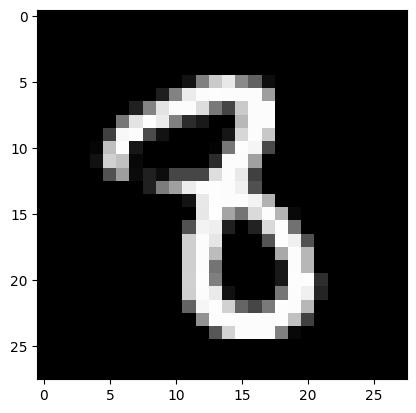

Prediction:  [8]
Label : 8


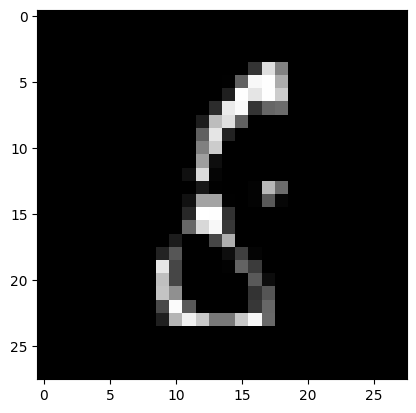

Prediction:  [4]
Label : 4


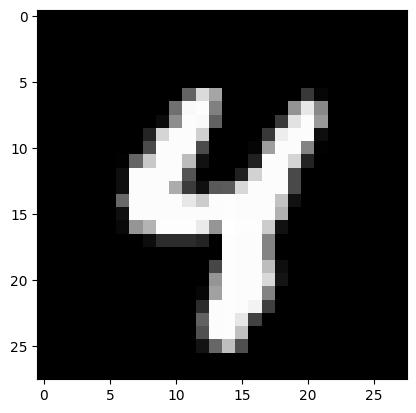

Prediction:  [0]
Label : 0


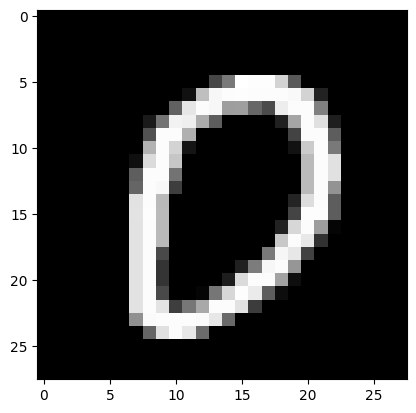

In [10]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)